<a href="https://www.kaggle.com/code/kusumakar/user-behavior-eda-and-prediction-99-42-accuracy?scriptVersionId=199146495" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")

In [3]:
#Check the Data
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
# Find the Null  values in Data
df.isnull().sum()


User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [5]:
# Unique Values in Device Model
df[['Device Model']].value_counts()

Device Model      
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

<Axes: xlabel='Device Model', ylabel='User Behavior Class'>

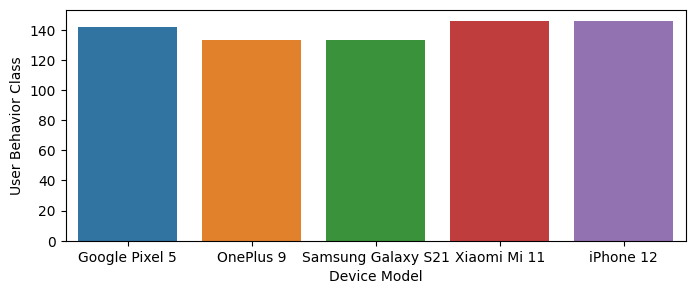

In [6]:
# Relationship between Model and User Behavior
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
sns.barplot(x="Device Model",y="User Behavior Class",data=df.groupby("Device Model").agg({"User Behavior Class":"count"}).reset_index())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='App Usage Time (min/day)', ylabel='User Behavior Class'>

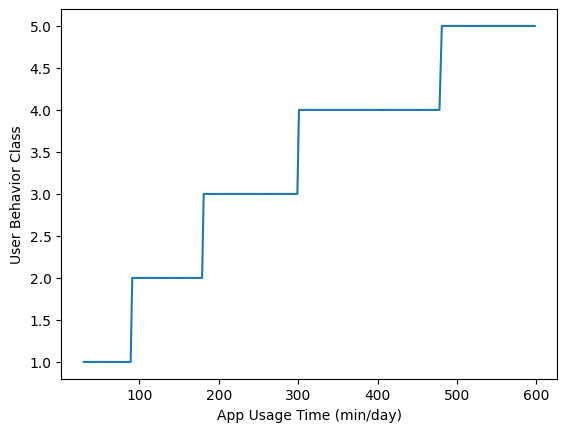

In [7]:
# Relationship between App Usage Time Vs User Class
sns.lineplot(x='App Usage Time (min/day)',y="User Behavior Class",data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Screen On Time (hours/day)', ylabel='User Behavior Class'>

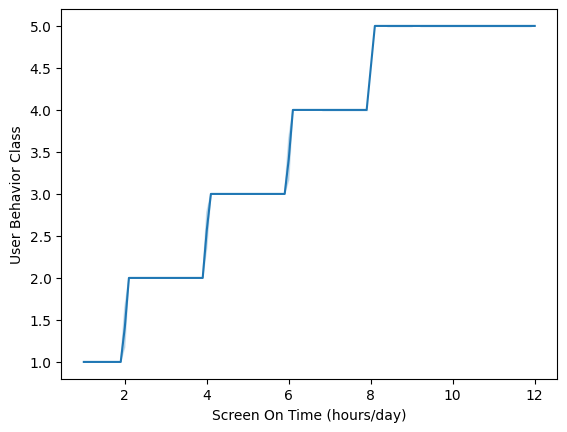

In [8]:

# Relationship between Screen On Time (hours/day) Vs User Class
sns.lineplot(x='Screen On Time (hours/day)',y="User Behavior Class",data=df)

<Axes: xlabel='Age', ylabel='User Behavior Class'>

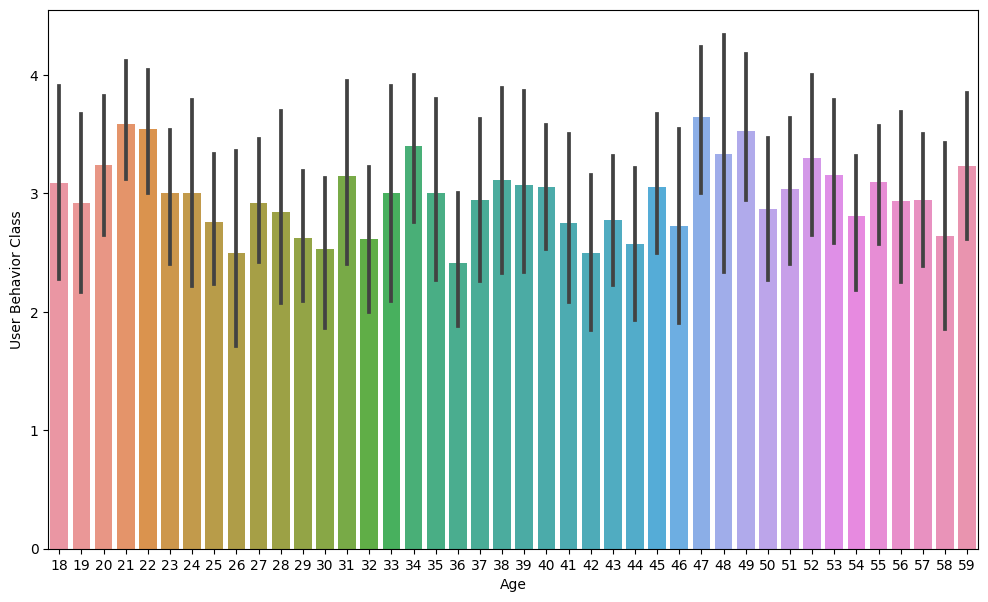

In [9]:
# Age Vs User Behavior
plt.figure(figsize=(12,7))
sns.barplot(x='Age',y="User Behavior Class",data=df)

<Axes: xlabel='Gender', ylabel='User Behavior Class'>

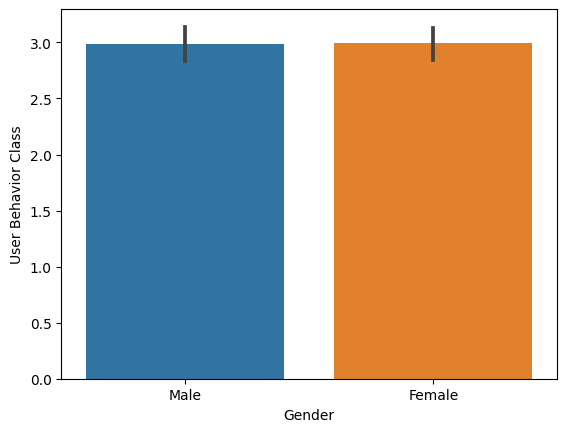

In [10]:
sns.barplot(x='Gender',y="User Behavior Class",data=df)

In [11]:
# Feature Engineering

In [12]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [13]:
#Rename columns for simplicity
df2=df.rename(columns={"Device Model":"Model","Operating System":"OS","App Usage Time (min/day)":"App Usage Time","Screen On Time (hours/day)":"Screen On Time","Battery Drain (mAh/day)":"Battery Drain","Number of Apps Installed":"Apps","Data Usage (MB/day)":"Data Usage"})

In [14]:
df2

,User ID,Model,OS,App Usage Time,Screen On Time,Battery Drain,Apps,Data Usage,Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [15]:
numerical=df2.select_dtypes(include=['int64','float64']).columns
categorical = df2.select_dtypes(include=['object']).columns

In [16]:
numerical,categorical

(Index(['User ID', 'App Usage Time', 'Screen On Time', 'Battery Drain', 'Apps',
        'Data Usage', 'Age', 'User Behavior Class'],
       dtype='object'),
 Index(['Model', 'OS', 'Gender'], dtype='object'))

<Axes: >

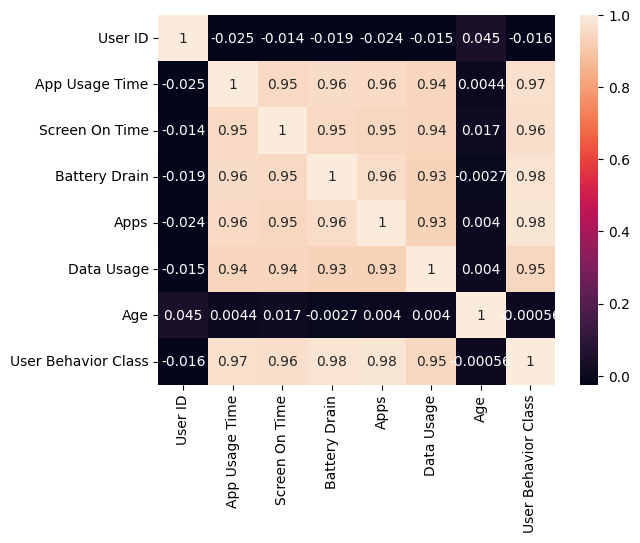

In [17]:
# Correlation Matrix
sns.heatmap(df2[numerical].corr(),annot=True)

### Numerical Features are highly Correlated. So we will use only App Usage Time for training our model (from numerical column)

In [18]:
independent_features = ['App Usage Time','Age','Gender','OS']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

transform = ColumnTransformer([
    
    ("scaler",StandardScaler(),['App Usage Time',"Age"]),
    ("one",OneHotEncoder(),["Gender","OS"])
    
],remainder="passthrough")

In [20]:
X=df2[['App Usage Time','Age','Gender','OS']]
Y=df2['User Behavior Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [21]:
X_train_transformed = transform.fit_transform(X_train)
X_test_transformed = transform.transform(X_test)


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test_transformed)

In [24]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy",accuracy_score(y_pred,y_test))

Accuracy 0.9942857142857143


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       1.00      0.97      0.99        34
           5       1.00      1.00      1.00        37

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

